# **Revisited Project EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':18})

In [2]:
import pyspark as ps
import pandas as pd
from pyspark.sql.functions import lit

In [3]:
# look at df created with spark importer

df = pd.read_csv('../data/2020-08-11_all.csv', lineterminator='\n')
df.head()

,Unnamed: 0,tweet_id,state,search_term_key,tweet_time,tweet_text,tweet_text_range,source,user_id,user_date_created,location,description,user_verified
0,0,1246830993903955968,AR,@joebiden,Sun Apr 05 16:04:08 +0000 2020,"lil pump really said ""look at my wrist corona ...",NaN,"<a href=""http://twitter.com/download/android"" ...",29214401,Mon Apr 06 14:53:51 +0000 2009,NaN,The son of Rage and Love,False
1,1,1246830994537222144,AR,@joebiden,Sun Apr 05 16:04:08 +0000 2020,@Stephan59177054 @NomikiKonst @JoeBiden I thou...,"[40, 126]","<a href=""http://twitter.com/download/android"" ...",4766479674,Sat Jan 16 04:42:14 +0000 2016,"geohell, disneyworld",i'm a fully automated toilet,False
2,2,1246830995132813312,AR,@joebiden,Sun Apr 05 16:04:08 +0000 2020,RT @Jali_Cat: Yet you’ve been in office since ...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",3166145611,Tue Apr 21 02:02:20 +0000 2015,NaN,Trump supporter! I follow back all Patriots. ...,False
3,3,1246830995761963008,AR,@joebiden,Sun Apr 05 16:04:09 +0000 2020,@JoeBiden This is a better message and more co...,"[10, 87]","<a href=""http://twitter.com/#!/download/ipad"" ...",2868989345,Sun Nov 09 14:12:09 +0000 2014,"North Huntingdon, PA",NaN,False
4,4,1246830995795369984,AR,@joebiden,Sun Apr 05 16:04:09 +0000 2020,RT @KaivanShroff: “I think it’s close to crimi...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",91865200,Sun Nov 22 20:47:43 +0000 2009,Colorado,#the Resistance🇱🇷,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117761 entries, 0 to 117760
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         117761 non-null  int64 
 1   tweet_id           117761 non-null  int64 
 2   state              117761 non-null  object
 3   search_term_key    117761 non-null  object
 4   tweet_time         117761 non-null  object
 5   tweet_text         117761 non-null  object
 6   tweet_text_range   45465 non-null   object
 7   source             117761 non-null  object
 8   user_id            117761 non-null  int64 
 9   user_date_created  117761 non-null  object
 10  location           86039 non-null   object
 11  description        100013 non-null  object
 12  user_verified      117761 non-null  bool  
dtypes: bool(1), int64(3), object(9)
memory usage: 10.9+ MB


In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117761 entries, 0 to 117760
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tweet_id           117761 non-null  int64 
 1   state              117761 non-null  object
 2   search_term_key    117761 non-null  object
 3   tweet_time         117761 non-null  object
 4   tweet_text         117761 non-null  object
 5   tweet_text_range   45465 non-null   object
 6   source             117761 non-null  object
 7   user_id            117761 non-null  int64 
 8   user_date_created  117761 non-null  object
 9   location           86039 non-null   object
 10  description        100013 non-null  object
 11  user_verified      117761 non-null  bool  
dtypes: bool(1), int64(2), object(9)
memory usage: 10.0+ MB


In [6]:
df = df.drop_duplicates(subset='tweet_id', ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117652 entries, 0 to 117651
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tweet_id           117652 non-null  int64 
 1   state              117652 non-null  object
 2   search_term_key    117652 non-null  object
 3   tweet_time         117652 non-null  object
 4   tweet_text         117652 non-null  object
 5   tweet_text_range   45427 non-null   object
 6   source             117652 non-null  object
 7   user_id            117652 non-null  int64 
 8   user_date_created  117652 non-null  object
 9   location           85966 non-null   object
 10  description        99927 non-null   object
 11  user_verified      117652 non-null  bool  
dtypes: bool(1), int64(2), object(9)
memory usage: 10.0+ MB


In [7]:
df_sorted = df.sort_values(by='tweet_id', ignore_index=True)

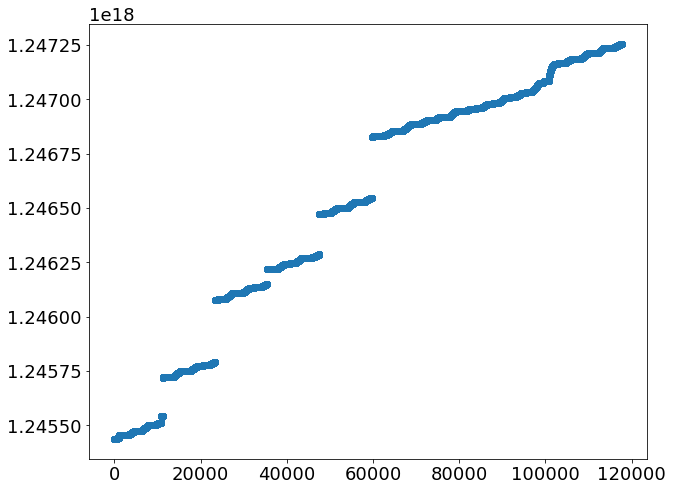

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(df_sorted.index, df_sorted.tweet_id)

In [9]:
df_sorted.tweet_id.unique().shape[0]

117652

In [10]:
df_sorted.tweet_id.shape[0]

117652

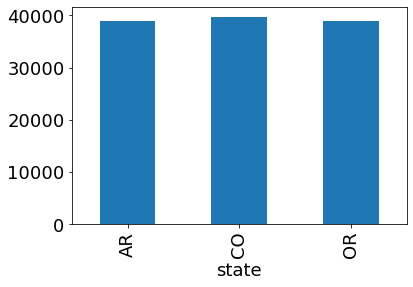

In [11]:
# lets check state classification balance

df.groupby('state').count()['tweet_id'].plot(kind='bar')
plt.show()

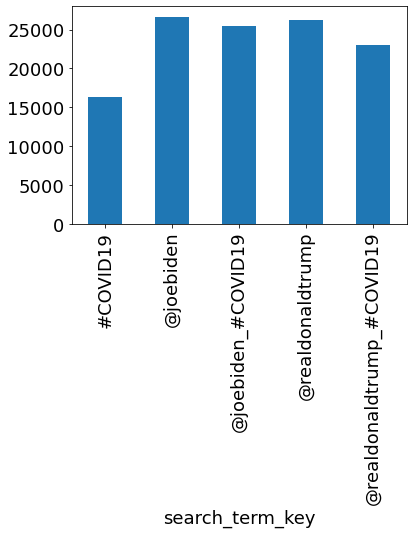

In [12]:
df.groupby('search_term_key').count()['tweet_id'].plot(kind='bar')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117652 entries, 0 to 117651
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tweet_id           117652 non-null  int64 
 1   state              117652 non-null  object
 2   search_term_key    117652 non-null  object
 3   tweet_time         117652 non-null  object
 4   tweet_text         117652 non-null  object
 5   tweet_text_range   45427 non-null   object
 6   source             117652 non-null  object
 7   user_id            117652 non-null  int64 
 8   user_date_created  117652 non-null  object
 9   location           85966 non-null   object
 10  description        99927 non-null   object
 11  user_verified      117652 non-null  bool  
dtypes: bool(1), int64(2), object(9)
memory usage: 10.0+ MB


In [14]:
from bs4 import BeautifulSoup


In [18]:
# remove tags from tweet text

def format_range(raw_text):
    if type(raw_text) == str: 
        start, end = ''.join([char for char in raw_text if char not in ['[', ',', ']']]).split(' ')
        return (int(start), int(end))
    else:
        return raw_text

In [19]:
df['text_text_range_as_tup'] = df['tweet_text_range'].apply(format_range)

In [20]:
def no_mentions_text(tup_range_series, raw_tweet_text_series):
    wo_mentions = np.empty(raw_tweet_text_series.shape, dtype='U256')
    for idx, tup in enumerate(tup_range_series):
        if type(tup) == tuple:
            wo_mentions[idx] = raw_tweet_text_series[idx][tup[0]:tup[1]]
        else:
            wo_mentions[idx] = raw_tweet_text_series[idx]
    return wo_mentions

In [21]:
df['wo_mentions'] = no_mentions_text(df['text_text_range_as_tup'], df['tweet_text'])

In [22]:
df.iloc[190:195]

,tweet_id,state,search_term_key,tweet_time,tweet_text,tweet_text_range,source,user_id,user_date_created,location,description,user_verified,text_text_range_as_tup,wo_mentions
190,1246946726595960837,AR,@joebiden,Sun Apr 05 23:44:01 +0000 2020,@FamishedCreator @BenSpielberg @JoeBiden @TomP...,"[51, 116]","<a href=""https://mobile.twitter.com"" rel=""nofo...",925241884313837569,Tue Oct 31 06:03:50 +0000 2017,Sunnyvale Trailer Park,"Free snark, Free answers to plumbing questions...",False,"(51, 116)",Id like to see @TomPerez wiping down the votin...
191,1246946727363514379,AR,@joebiden,Sun Apr 05 23:44:01 +0000 2020,"Let me ask you something @amyklobuchar, @PeteB...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",490076756,Sun Feb 12 06:04:45 +0000 2012,Minnesota,A stranger in a strange land. Fuck your presid...,False,NaN,"Let me ask you something @amyklobuchar, @PeteB..."
192,1246946727896272896,AR,@joebiden,Sun Apr 05 23:44:01 +0000 2020,Bruh I get so tired of u broke ass niggas stea...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1229960245381865473,Wed Feb 19 02:45:58 +0000 2020,austin houston,🇯🇲 ♎︎ ☉ ♎︎ ☾ ♎︎⇡robyen ⚢ 21. sc: hippigale,False,NaN,Bruh I get so tired of u broke ass niggas stea...
193,1246946728575672320,AR,@joebiden,Sun Apr 05 23:44:01 +0000 2020,"@JoeBiden Joe, what is Namenda?","[10, 31]","<a href=""http://twitter.com/download/android"" ...",452669003,Mon Jan 02 03:41:14 +0000 2012,"Tyler, TX",NaN,False,"(10, 31)","Joe, what is Namenda?"
194,1246946729129320449,AR,@joebiden,Sun Apr 05 23:44:02 +0000 2020,@ScottPresler @JoeBiden @DrBiden I know so man...,"[33, 140]","<a href=""http://twitter.com/download/android"" ...",244674034,Sat Jan 29 21:34:34 +0000 2011,New Hampshire,"Proud American,Italian heritage, supporter of...",False,"(33, 140)",I know so many fathers that if it was their da...


In [23]:
source = df['source']
source

0         <a href="http://twitter.com/download/android" ...
1         <a href="http://twitter.com/download/android" ...
2         <a href="https://mobile.twitter.com" rel="nofo...
3         <a href="http://twitter.com/#!/download/ipad" ...
4         <a href="http://twitter.com/download/iphone" r...
                                ...                        
117647    <a href="http://twitter.com/download/iphone" r...
117648    <a href="http://twitter.com/download/android" ...
117649    <a href="http://twitter.com/download/iphone" r...
117650    <a href="https://mobile.twitter.com" rel="nofo...
117651    <a href="http://twitter.com/download/android" ...
Name: source, Length: 117652, dtype: object

In [26]:
BeautifulSoup(source[0]).find('a').getText()

'Twitter for Android'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117652 entries, 0 to 117651
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   tweet_id                117652 non-null  int64 
 1   state                   117652 non-null  object
 2   search_term_key         117652 non-null  object
 3   tweet_time              117652 non-null  object
 4   tweet_text              117652 non-null  object
 5   tweet_text_range        45427 non-null   object
 6   source                  117652 non-null  object
 7   user_id                 117652 non-null  int64 
 8   user_date_created       117652 non-null  object
 9   location                85966 non-null   object
 10  description             99927 non-null   object
 11  user_verified           117652 non-null  bool  
 12  text_text_range_as_tup  45427 non-null   object
 13  wo_mentions             117652 non-null  object
dtypes: bool(1), int64(2), object(11)
mem